# Assignment 1

Deadline: 19.03.2025, 12:00 CET

<Add your name, student-id and emal address>
* Zihan Liu, 22-736-938, zihan.liu@uzh.ch
* Yujie Tao, 23-744-378, yujie.tao@uzh.ch
* Weijie Chen, 23-743-727, weijie.chen@uzh.ch
* Schmidli Adrian, 17-728-833, adrian.schmidli@uzh.ch

In [1]:
# Import standard libraries
import os
import sys
import timeit # To compute runtimes
from typing import Optional

# Import third-party libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import local modules
project_root = os.path.dirname(os.path.dirname(os.getcwd()))   # Change this path if needed
src_path = os.path.join(project_root, 'qpmwp-course\\src')
sys.path.append(project_root)
sys.path.append(src_path)
from estimation.covariance import Covariance
from estimation.expected_return import ExpectedReturn
from optimization.constraints import Constraints
from optimization.optimization import Optimization, Objective
from optimization.optimization_data import OptimizationData
from optimization.quadratic_program import QuadraticProgram, USABLE_SOLVERS

In [ ]:
# Test data for the new functions in the class "ExpectedReturn"
df = pd.read_csv('c:/Users/admin\OneDrive/Dokumente/Studium UZH/Master/5. Semester/Quantitative Portfolio Management with Python/Assingments/1. Assingment/2. Werkstatt/qpmwp-course/data/msci_country_indices.csv',
                 index_col=0, header=0, parse_dates=True, date_format='%d-%m-%Y')
df = df.tail(10).iloc[:, :10]
print(df)
# df.to_csv('test.csv', index=False)

                  AT        AU        BE        CA        CH        DE  \
Index                                                                    
2023-04-05 -0.004435 -0.000488  0.005040 -0.005312  0.003285 -0.005872   
2023-04-06  0.010041 -0.001429  0.006269  0.001646  0.009571  0.004612   
2023-04-07  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2023-04-10  0.000000  0.000000  0.000000  0.003630  0.000000  0.000000   
2023-04-11  0.014592  0.013067 -0.000486  0.007168  0.003041  0.004867   
2023-04-12 -0.002488  0.004714 -0.012072  0.001708  0.000017  0.002662   
2023-04-13  0.001297 -0.003806 -0.000049  0.004728  0.000913  0.002400   
2023-04-14  0.009533  0.004829  0.007622  0.001950  0.008387  0.005797   
2023-04-17 -0.005665  0.003404  0.004917  0.003392 -0.001485 -0.002086   
2023-04-18  0.004836 -0.003262 -0.007127  0.002161  0.004373  0.006089   

                  DK        ES        FI        FR  
Index                                               
2023-

In [ ]:
# Test of the new functions in the class "ExpectedReturn"
mu_1 = ExpectedReturn(method='geometric').estimate(df, inplace=False)
mu_2 = ExpectedReturn(method='arithmetic').estimate(df, inplace=False)
mu_3 = ExpectedReturn(method='harmonic').estimate(df, inplace=False)
mu_4 = ExpectedReturn(method='ewm', scalefactor=1, span=10, reverse=True).estimate(df, inplace=False)
print(mu_1)
print(mu_2)
print(mu_3)
print(mu_4)

AT    0.002751
AU    0.001692
BE    0.000394
CA    0.002102
CH    0.002804
DE    0.001840
DK    0.005431
ES    0.002810
FI    0.000145
FR    0.002552
dtype: float64
AT    0.002771
AU    0.001703
BE    0.000411
CA    0.002107
CH    0.002810
DE    0.001847
DK    0.005463
ES    0.002827
FI    0.000156
FR    0.002562
dtype: float64
AT    0.002730
AU    0.001681
BE    0.000377
CA    0.002098
CH    0.002798
DE    0.001834
DK    0.005399
ES    0.002793
FI    0.000135
FR    0.002543
dtype: float64
AT    0.002692
AU    0.001514
BE   -0.000321
CA    0.002683
CH    0.002701
DE    0.002629
DK    0.007262
ES    0.002627
FI   -0.000573
FR    0.003194
dtype: float64


## 1. Solver Horse Race

### 1.a)
(3 points)

Generate a Multivariate-Normal random dataset of dimension TxN, T=1000, N=100, and compute a vector of expected returns, q, and a covariance matrix, P, using classes ExpectedReturn and Covariance respectively.

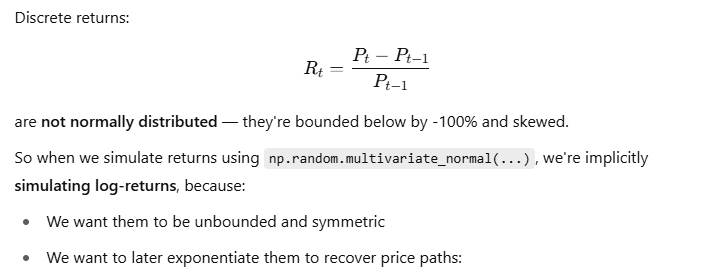
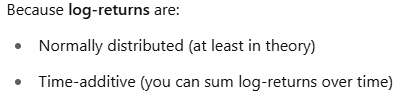

In [ ]:

# Set the dimensions
T = 1000 # Number of time periods
N = 100 # Number of assets

# Generate a random mean vector and covariance matrix for the multivariate normal distribution
mean = np.random.randn(N)  # Random mean vector of size N
cov = np.random.randn(N, N)  # Random covariance matrix of size N x N
# np.random.randn is a NumPy function that generates samples from a standard normal distribution (mean = 0, standard deviation = 1)
cov = (cov + cov.T) / 2  # Ensure symmetry

# Generate the Multivariate-Normal random dataset
np.random.seed(7) # Set random seed for reproducibility
df1 = np.random.multivariate_normal(mean, cov, size=T) / 100 # Scale the data to represent returns
df1 = np.exp(df1) - 1  # Convert to discrete returns

# Convert the dataset to a DataFrame for easier manipulation
#df = pd.DataFrame(data, columns=[f'Asset_{i+1}' for i in range(N)])

# Compute the vector of expected returns (mean returns) from df
# q =  <your code here>

# Compute the covariance matrix from df
# P = <your code here>

# Display the results
#print("Vector of expected returns (q):")
#print(q)

#print("\nCovariance matrix (P):")
#print(P)

[[ 0.04407087  0.01971215 -0.01778152 ...  0.03089326 -0.01191899
  -0.02556417]
 [-0.01182978 -0.01467388  0.02426131 ... -0.0082658  -0.00744613
   0.01495446]
 [ 0.00651476  0.02659335  0.02204927 ... -0.01541374  0.02521646
  -0.00387934]
 ...
 [-0.01915561 -0.00593718  0.01734516 ... -0.02659606 -0.01047636
   0.02265578]
 [-0.00159919  0.03419423 -0.01993825 ... -0.01653803 -0.01117504
   0.01434142]
 [ 0.00865134 -0.00565548  0.02182421 ...  0.02743502 -0.02256419
  -0.00575845]]


C:\Users\admin\AppData\Local\Temp\ipykernel_7800\1510105312.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  df1 = np.random.multivariate_normal(mean, cov, size=T) / 100 # Scale the data to represent returns


### 1.b)
(3 points)

Instantiate a constraints object by injecting column names of the data created in 1.a) as ids and add:
- a budget constaint (i.e., asset weights have to sum to one)
- lower bounds of 0.0 for all assets
- upper bounds of 0.2 for all assets
- group contraints such that the sum of the weights of the first 30 assets is <= 0.3, the sum of assets 31 to 60 is <= 0.4 and the sum of assets 61 to 100 is <= 0.5

In [ ]:
# Instantiate the Constraints class
constraints = Constraints(ids = df.columns.tolist())

# Add budget constraint
#<your code here>

# Add box constraints (i.e., lower and upper bounds)
#<your code here>

# Add linear constraints
#<your code here>

### 1.c) 
(4 points)

Solve a Mean-Variance optimization problem (using coefficients P and q in the objective function) which satisfies the above defined constraints.
Repeat the task for all open-source solvers in qpsolvers and compare the results in terms of:

- runtime
- accuracy: value of the primal problem.
- reliability: are all constarints fulfilled? Extract primal resisduals, dual residuals and duality gap.

Generate a DataFrame with the solvers as column names and the following row index: 'solution_found': bool, 'objective': float, 'primal_residual': float, 'dual_residual': float, 'duality_gap': float, 'runtime': float.

Put NA's for solvers that failed for some reason (e.g., unable to install the package or solvers throws an error during execution). 




In [ ]:
# Extract the constraints in the format required by the solver
GhAb = constraints.to_GhAb()

# Loop over solvers, instantiate the quadratic program, solve it and store the results
#<your code here>

Print and visualize the results

In [5]:
#<your code here>

## 2. Analytical Solution to Minimum-Variance Problem

(5 points)

- Create a `MinVariance` class that follows the structure of the `MeanVariance` class.
- Implement the `solve` method in `MinVariance` such that if `solver_name = 'analytical'`, the analytical solution is computed and stored within the object (if such a solution exists). If not, call the `solve` method from the parent class.
- Create a `Constraints` object by injecting the same ids as in part 1.b) and add a budget constraint.
- Instantiate a `MinVariance` object by setting `solver_name = 'analytical'` and passing instances of `Constraints` and `Covariance` as arguments.
- Create an `OptimizationData` object that contains an element `return_series`, which consists of the synthetic data generated in part 1.a).
- Solve the optimization problem using the created `MinVariance` object and compare the results to those obtained in part 1.c).


In [ ]:
# Define class MinVariance
class MinVariance(Optimization):

    def __init__(self,
                 constraints: Constraints,
                 covariance: Optional[Covariance] = None,
                 **kwargs):
        super().__init__(
            constraints=constraints,
            **kwargs
        )
        self.covariance = Covariance() if covariance is None else covariance

    def set_objective(self, optimization_data: OptimizationData) -> None:
        #<your code here>

    def solve(self) -> None:
        if self.params.get('solver_name') == 'analytical':
            #<your code here>
            return None
        else:
            return super().solve()


# Create a constraints object with just a budget constraint
#<your code here>

# Instantiate the MinVariance class
#<your code here>

# Prepare the optimization data and prepare the optimization problem
#<your code here>

# Solve the optimization problem and print the weights
#<your code here>